In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data/poultry_weight_15_08_2023.csv')
df_lot_info = pd.read_csv('data/lot_info_15_ago_2023.csv')

In [4]:
df_novo = df.merge(df_lot_info[['input_total','uuid',  'deaths', 'mortality', 'output_total' ]], 
                            left_on='animal_group_uuid', 
                            right_on='uuid', 
                            how='left')

df_novo = df_novo.drop(columns=['uuid'])
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,NaN,NaN,NaN,NaN
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,NaN,NaN,NaN,NaN
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,NaN,NaN,NaN,NaN
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,NaN,NaN,NaN,NaN


In [5]:
#mediana de mortality
mediana_mortalidade = df_novo['mortality'].median()
#preencher mortality nan com mediana
df_novo['mortality'] = df_novo['mortality'].fillna(mediana_mortalidade)

#mediana de deaths
mediana_deaths = df_novo['deaths'].median()
#preencher deaths nan com mediana
df_novo['deaths'] = df_novo['deaths'].fillna(mediana_deaths)

#mediana de input_total
mediana_input_total = df_novo['input_total'].median()
#preencher input_total nan com mediana
df_novo['input_total'] = df_novo['input_total'].fillna(mediana_input_total) 
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,28000.0,1114.0,4.316770,NaN
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,28000.0,1114.0,4.316770,NaN
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,28000.0,1114.0,4.316770,NaN
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,28000.0,1114.0,4.316770,NaN


In [6]:
#calcular a porcentagem de animais utilizados em cada pesagem com relação ao input_total ou balance_animal_stock_accumulated
df_novo['percent_usable'] = ( df_novo['total_animal_measurement']/df_novo[['input_total', 'balance_animals_stock_accumulated']].max(axis=1)) * 100
#df_novo['percent_usable'] = (df_novo['total_animal_measurement']/df_novo['input_total'] * 100) 
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,28000.0,1114.0,4.316770,NaN,0.003289
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,28000.0,1114.0,4.316770,NaN,0.003289
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,28000.0,1114.0,4.316770,NaN,0.003289
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,28000.0,1114.0,4.316770,NaN,0.003289


In [7]:
df_filtrado = df_novo[(df_novo['total_measurement_weight'] > 4000) & (df_novo['total_measurement_weight'] < 10000)]

In [8]:
#df_novo['input_weight_media'] = df_novo['total_measurement_weight']/df_novo['total_animal_measurement']
condicao = df_novo['total_measurement_weight'] > 10
# Atribua os valores com base na condição
df_novo['input_weight_media'] = np.where(condicao, df_novo['total_measurement_weight'] / df_novo['total_animal_measurement'], df_novo['total_measurement_weight'])

In [9]:
#criar coluna output_weight_media
df_novo['output_weight_media'] = df_novo.groupby('animal_group_uuid')['input_weight_media'].transform('max')

In [10]:
#remover linhas que contem valores nulos para ouput_total e input_total
df_novo = df_novo.dropna(subset=['output_total', 'input_total'])

In [11]:
#ordenar dados por animal_group_uuid e depois por reference_date	
df_ordenado = df_novo.sort_values(by=['animal_group_uuid', 'reference_date'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_pdf import PdfPages


KeyboardInterrupt: 

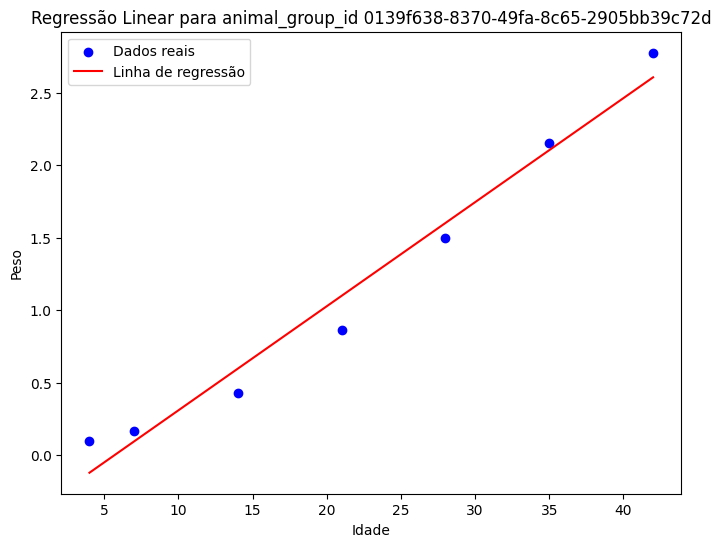

In [13]:
#utilizando LinearRegression para prever dados por lote

with PdfPages('regressoes.pdf') as pdf:
    for lote_id, group in df_ordenado.groupby('animal_group_uuid'):
        X = group['animal_group_age'].values.reshape(-1, 1)
        y = group['input_weight_media'].values
        
        regressor = LinearRegression()
        regressor.fit(X, y) 
        y_pred = regressor.predict(X)

        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label='Dados reais')
        plt.plot(X, y_pred, color='red', label='Linha de regressão')
        plt.title(f'Regressão Linear para animal_group_id {lote_id}')
        plt.xlabel('Idade')
        plt.ylabel('Peso')
        plt.legend()
        
        # Salvar no PDF
        pdf.savefig()
        plt.close()


In [15]:
#utilizando LinearRegression para prever dados por lote
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

mae_errors = []  
mse_errors = []

for lote_id, group in df_ordenado.groupby('animal_group_uuid'):
    X = group['animal_group_age'].values.reshape(-1, 1)
    y = group['input_weight_media'].values

    regressor = LinearRegression()
    regressor.fit(X, y) 
    y_pred = regressor.predict(X)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    mae_errors.append(mae)
    mse_errors.append(mse)


In [17]:
#mediana de mae 
mediana_mae = np.median(mae_errors)
#mediana de mse
mediana_mse = np.median(mse_errors)
print(f'Mediana de MAE: {mediana_mae}') 
print(f'Mediana de MSE: {mediana_mse}')


Mediana de MAE: 0.14380652061187446
Mediana de MSE: 0.025454647449219003


In [18]:
#media de mae
media_mae = np.mean(mae_errors)
#media de mse
media_mse = np.mean(mse_errors)
print(f'Média de MAE: {media_mae}')
print(f'Média de MSE: {media_mse}')

Média de MAE: 0.540428296171627
Média de MSE: 329.6900678454318
